### Actividad AG_1.1

Ivanna Maldonado Cervantes 

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [347]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')

In [348]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643872 entries, 0 to 1643871
Data columns (total 8 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   TaxonName                         1643872 non-null  object 
 1   TaxonCode                         1643872 non-null  object 
 2   SamplingOperations_code           1643872 non-null  object 
 3   CodeSite_SamplingOperations       1643872 non-null  object 
 4   Date_SamplingOperation            1643872 non-null  object 
 5   Abundance_nbcell                  1643872 non-null  int64  
 6   TotalAbundance_SamplingOperation  1643872 non-null  int64  
 7   Abundance_pm                      1643872 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 100.3+ MB


TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

#### **Procesamos outliers**

In [349]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = ["Abundance_nbcell", "TotalAbundance_SamplingOperation", "Abundance_pm"]
cualitativas = ["TaxonName", "TaxonCode", "SamplingOperations_code",
    "CodeSite_SamplingOperations", "Date_SamplingOperation"]

In [350]:
#Método aplicando desviación estandar. Encuentro los valores extremos
#desv est detecta menos datos outliers que interquartilicos.
y = cuantitativas
Limite_Superior = df[y].mean() + 3 * df[y].std()
Limite_Inferior = df[y].mean() - 3 * df[y].std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [351]:
# Obtenemos datos y los outliers se convierten en nulos en el DataFrame
for col in cuantitativas:
	df.loc[(df[col] > Limite_Superior[col]) | (df[col] < Limite_Inferior[col]), col] = np.nan
df

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


In [352]:
#Corroboramos valores nulos del dataframe4
valores_nulos=df.isnull().sum()
valores_nulos

TaxonName                               0
TaxonCode                               0
SamplingOperations_code                 0
CodeSite_SamplingOperations             0
Date_SamplingOperation                  0
Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [353]:
# con ayuda de chatGPT ya que no me corría el código
data_clean = df.copy()

for col in df.select_dtypes(include=["int64", "float64"]).columns:
    data_clean[col] = data_clean[col].fillna(df[col].mean())

data_clean

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


In [354]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

#### **Análsis de variables categóricas**

**TaxonName**

In [355]:
tabla_freq = data_clean['TaxonName'].value_counts().reset_index()
tabla_freq

,TaxonName,count
0,Achnanthes minutissima,43691
1,Amphora pediculus,39209
2,Cocconeis euglypta,38570
3,Sellaphora nigri,38039
4,Navicula cryptotenella,37723
...,...,...
2287,Encyonopsis neoamphioxys,1
2288,Encyonopsis recta,1
2289,Lindavia bodanica,1
2290,Leptocylindrus minimus,1


In [356]:
# filtro con los valores más relevantes de la variable 
filtro = tabla_freq[tabla_freq['count']>18900]
filtro

,TaxonName,count
0,Achnanthes minutissima,43691
1,Amphora pediculus,39209
2,Cocconeis euglypta,38570
3,Sellaphora nigri,38039
4,Navicula cryptotenella,37723
5,Nitzschia dissipata,34461
6,Vibrio tripunctatus,30899
7,Rhoicosphenia abbreviata,30560
8,Navicula permitis,29789
9,Achnanthes lanceolata,27239


In [357]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index = filtro.set_index('TaxonName')
filtro_index.head()

,count
TaxonName,
Achnanthes minutissima,43691
Amphora pediculus,39209
Cocconeis euglypta,38570
Sellaphora nigri,38039
Navicula cryptotenella,37723


Text(0, 0.5, 'Frecuencia')

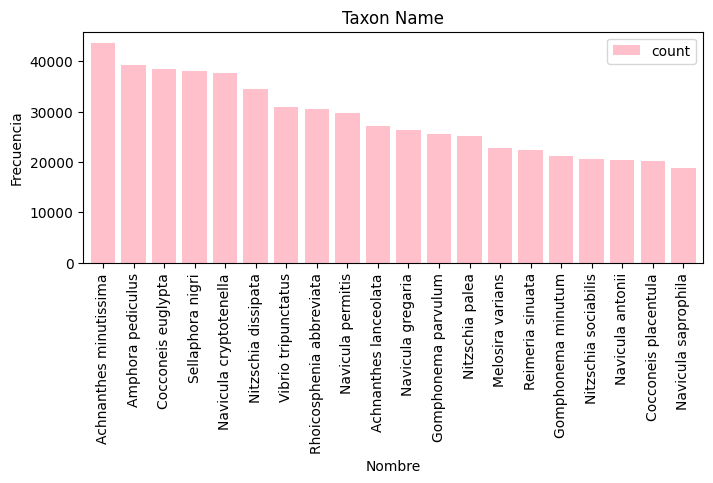

In [358]:
# realizamos gráfico de barras
filtro_index.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "pink")
plt. title('Taxon Name')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

**TaxonCode**

In [359]:
tabla_freq1 = data_clean['TaxonCode'].value_counts().reset_index()
tabla_freq1

,TaxonCode,count
0,Achmi02,43691
1,Amppe02,39209
2,Coceu01,38570
3,Selni01,38039
4,Navcr09,37723
...,...,...
2287,Encne03,1
2288,Encre01,1
2289,Linbo01,1
2290,Lepmi01,1


In [360]:
# filtro con los valores más relevantes de la variable 
filtro1 = tabla_freq1[tabla_freq1['count']>18900]
filtro1

,TaxonCode,count
0,Achmi02,43691
1,Amppe02,39209
2,Coceu01,38570
3,Selni01,38039
4,Navcr09,37723
5,Nitdi04,34461
6,Vibtr01,30899
7,Rhoab01,30560
8,Navpe05,29789
9,Achla02,27239


In [361]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index1 = filtro1.set_index('TaxonCode')
filtro_index1.head()

,count
TaxonCode,
Achmi02,43691
Amppe02,39209
Coceu01,38570
Selni01,38039
Navcr09,37723


Text(0, 0.5, 'Frecuencia')

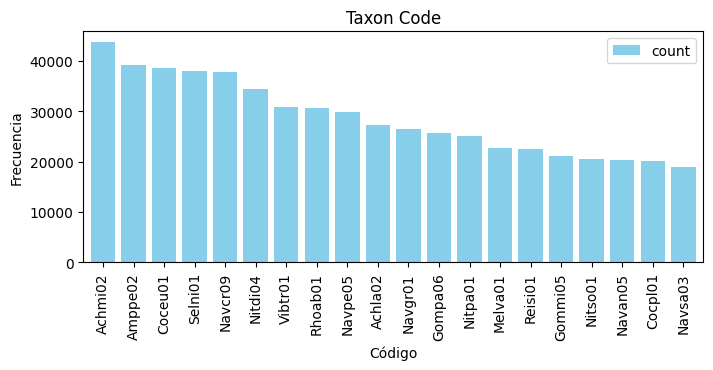

In [362]:
# realizamos gráfico de barras
filtro_index1.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "skyblue")
plt. title('Taxon Code')
plt.xlabel('Código')
plt.ylabel('Frecuencia')

**SamplingOperations_code**

In [363]:
tabla_freq2 = data_clean['SamplingOperations_code'].value_counts().reset_index()
tabla_freq2

,SamplingOperations_code,count
0,S05051000_20080722,97
1,S05119000_20160627,97
2,S05068700_20070904,94
3,S04103550_20150811,92
4,S04215520_20200702,92
...,...,...
49226,S05192040_20170914,2
49227,S05224100_20080821,2
49228,S05221600_20080826,1
49229,S04022000_20150605,1


In [364]:
# filtro con los valores más relevantes de la variable 
filtro2 = tabla_freq2[tabla_freq2['count']>89]
filtro2

,SamplingOperations_code,count
0,S05051000_20080722,97
1,S05119000_20160627,97
2,S05068700_20070904,94
3,S04103550_20150811,92
4,S04215520_20200702,92
5,S04304002_20200907,92
6,S04615008_20130719,91
7,S03132260_20120718,91


In [365]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index2 = filtro2.set_index('SamplingOperations_code')
filtro_index2

,count
SamplingOperations_code,
S05051000_20080722,97
S05119000_20160627,97
S05068700_20070904,94
S04103550_20150811,92
S04215520_20200702,92
S04304002_20200907,92
S04615008_20130719,91
S03132260_20120718,91


<Axes: ylabel='count'>

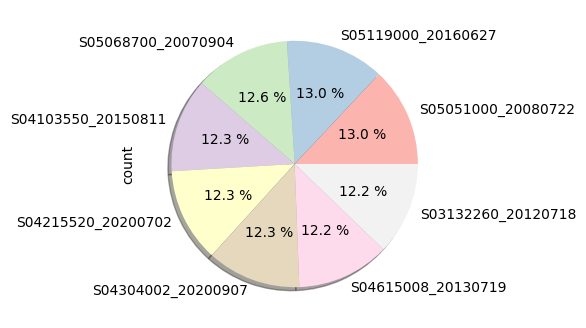

In [366]:
filtro_index2["count"].plot(kind = 'pie', figsize=(10,4), shadow = True, autopct="%0.1f %%", colormap ='Pastel1')

**Date_SamplingOperation**

In [367]:
tabla_freq3 = data_clean['Date_SamplingOperation'].value_counts().reset_index()
tabla_freq3

,Date_SamplingOperation,count
0,2013-07-11,4545
1,2013-07-17,4431
2,2013-07-16,4401
3,2015-07-08,4376
4,2018-07-17,4278
...,...,...
2232,2015-02-09,9
2233,2015-02-12,9
2234,2014-02-24,8
2235,2017-02-06,8


In [368]:
# filtro con los valores más relevantes de la variable 
filtro3 = tabla_freq3[tabla_freq3['count']>3503]
filtro3

,Date_SamplingOperation,count
0,2013-07-11,4545
1,2013-07-17,4431
2,2013-07-16,4401
3,2015-07-08,4376
4,2018-07-17,4278
5,2015-06-24,4126
6,2012-07-25,4091
7,2012-07-24,3833
8,2016-07-21,3742
9,2016-07-20,3706


In [369]:
# ajusto el index el df (variables categoricas de tipo string y numericas)
filtro_index3 = filtro3.set_index('Date_SamplingOperation')
filtro_index3

,count
Date_SamplingOperation,
2013-07-11,4545
2013-07-17,4431
2013-07-16,4401
2015-07-08,4376
2018-07-17,4278
2015-06-24,4126
2012-07-25,4091
2012-07-24,3833
2016-07-21,3742


Text(0, 0.5, 'Frecuencia')

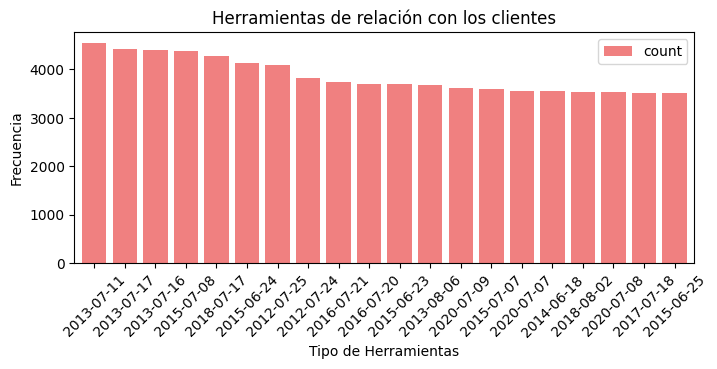

In [370]:
# realizamos gráfico de barras
filtro_index3.plot(kind = 'bar', width = 0.8, figsize=(8,3), color = "lightcoral", rot=45)
plt. title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramientas')
plt.ylabel('Frecuencia')

#### **Análsis de Sturges con variables numéricas**

**Abundance_nbcell**

In [371]:
data_clean['Abundance_nbcell'].info()
n = 1643872

<class 'pandas.core.series.Series'>
RangeIndex: 1643872 entries, 0 to 1643871
Series name: Abundance_nbcell
Non-Null Count    Dtype  
--------------    -----  
1643872 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [372]:
# maximo y minimo, limites
max = data_clean['Abundance_nbcell'].max()
min = data_clean['Abundance_nbcell'].min()
limites = [min, max]
limites

[np.float64(1.0), np.float64(94.0)]

In [373]:
# rango r
r =max-min
r

np.float64(93.0)

In [374]:
# numero de intervalos de la clase "ni", aplicando la reglad e Sturges
ni = 1+3.32*np.log10(n)
ni

np.float64(21.636681754041682)

In [375]:
# ancho del intervalo "i"
i = r/ni
i

np.float64(4.298256130824118)

In [376]:
# categorizacion de variables
# declaramos intervalos
# ajustamos los limites para que todos los valores sean inclusidos en los intervalos
# ampliamos los limites en una unidad 0.1 sobre los deciamles menos significativos
# con la intención de incluir los valores que caigan en los limites
intervalos = np.linspace(0.9, 94.2,22)
intervalos


array([ 0.9       ,  5.34285714,  9.78571429, 14.22857143, 18.67142857,
       23.11428571, 27.55714286, 32.        , 36.44285714, 40.88571429,
       45.32857143, 49.77142857, 54.21428571, 58.65714286, 63.1       ,
       67.54285714, 71.98571429, 76.42857143, 80.87142857, 85.31428571,
       89.75714286, 94.2       ])

In [377]:
#Creamos las categorías 
categorias = [
 "Categoría1 (1 a 5)",
 "Categoría2 (5 a 10)",
 "Categoría3 (10 a 14)",
 "Categoría4 (14 a 19)",
 "Categoría5 (19 a 23)",
 "Categoría6 (23 a 28)",
 "Categoría7 (28 a 32)",
 "Categoría8 (32 a 36)",
 "Categoría9 (36 a 41)",
 "Categoría10 (41 a 45)",
 "Categoría11 (45 a 50)",
 "Categoría12 (50 a 54)",
 "Categoría13 (54 a 59)",
 "Categoría14 (59 a 63)",
 "Categoría15 (63 a 67)",
 "Categoría16 (67 a 72)",
 "Categoría17 (72 a 76)",
 "Categoría18 (76 a 81)",
 "Categoría19 (81 a 85)",
 "Categoría20 (85 a 90)",
 "Categoría21 (90 a 94)"
]


In [378]:
# Finalmente creamos las categorías en la columna numérica
data_clean['Abundance_nbcell'] = pd.cut(x=data_clean['Abundance_nbcell'], bins=intervalos, labels=labels)
data_clean['Abundance_nbcell']

0          Categoría2
1          Categoría1
2          Categoría1
3          Categoría1
4          Categoría1
              ...    
1643867    Categoría1
1643868    Categoría1
1643869    Categoría1
1643870    Categoría2
1643871    Categoría1
Name: Abundance_nbcell, Length: 1643872, dtype: category
Categories (21, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría18' < 'Categoría19' < 'Categoría20' < 'Categoría21']

In [379]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = data_clean['Abundance_nbcell'].value_counts().reset_index()
Tabla_freq

,Abundance_nbcell,count
0,Categoría1,1060286
1,Categoría2,221947
2,Categoría3,111158
3,Categoría4,52364
4,Categoría5,44411
5,Categoría6,26312
6,Categoría7,24655
7,Categoría8,15694
8,Categoría10,13288
9,Categoría9,13111


In [380]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>13111]
Filtro

,Abundance_nbcell,count
0,Categoría1,1060286
1,Categoría2,221947
2,Categoría3,111158
3,Categoría4,52364
4,Categoría5,44411
5,Categoría6,26312
6,Categoría7,24655
7,Categoría8,15694
8,Categoría10,13288


In [381]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('Abundance_nbcell')
Filtro_index

,count
Abundance_nbcell,
Categoría1,1060286
Categoría2,221947
Categoría3,111158
Categoría4,52364
Categoría5,44411
Categoría6,26312
Categoría7,24655
Categoría8,15694
Categoría10,13288


Text(0, 0.5, 'Frecuencia')

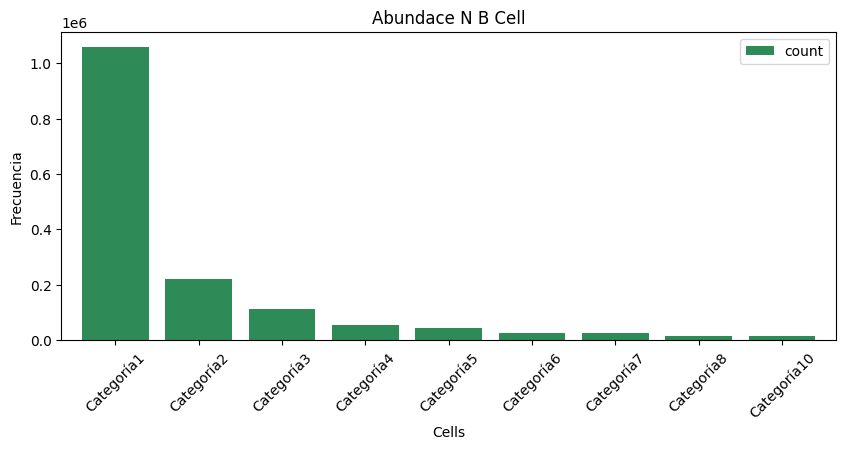

In [382]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "seagreen", rot=45)
plt.title('Abundace N B Cell')
plt.xlabel('Cells')
plt.ylabel('Frecuencia')

**TotalAbundance_SamplingOperation**

In [383]:
data_clean['TotalAbundance_SamplingOperation'].info()
n = 1643872

<class 'pandas.core.series.Series'>
RangeIndex: 1643872 entries, 0 to 1643871
Series name: TotalAbundance_SamplingOperation
Non-Null Count    Dtype  
--------------    -----  
1643872 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [384]:
# maximo y minimo, limites
max = data_clean['TotalAbundance_SamplingOperation'].max()
min = data_clean['TotalAbundance_SamplingOperation'].min()
limites = [min, max]
limites

[np.float64(375.0), np.float64(437.0)]

In [385]:
# rango r
r =max-min
r

np.float64(62.0)

In [386]:
# numero de intervalos de la clase "ni", aplicando la reglad e Sturges
ni = 1+3.32*np.log10(n)
ni

np.float64(21.636681754041682)

In [387]:
# ancho del intervalo "i"
i = r/ni
i

np.float64(2.865504087216079)

In [388]:
# categorizacion de variables
intervalos = np.linspace(374.9, 437.2,22)
intervalos

array([374.9       , 377.86666667, 380.83333333, 383.8       ,
       386.76666667, 389.73333333, 392.7       , 395.66666667,
       398.63333333, 401.6       , 404.56666667, 407.53333333,
       410.5       , 413.46666667, 416.43333333, 419.4       ,
       422.36666667, 425.33333333, 428.3       , 431.26666667,
       434.23333333, 437.2       ])

In [389]:
categorias = [
 "Categoría1 (375 a 378)", "Categoría2 (378 a 381)", "Categoría3 (381 a 384)", "Categoría4 (384 a 387)",
 "Categoría5 (387 a 390)", "Categoría6 (390 a 393)", "Categoría7 (393 a 396)", "Categoría8 (396 a 399)", 
 "Categoría9 (399 a 402)", "Categoría10 (402 a 405)", "Categoría11 (405 a 408)", "Categoría12 (408 a 411)",
 "Categoría13 (411 a 413)", "Categoría14 (413 a 416)", "Categoría15 (416 a 419)", "Categoría16 (419 a 422)",
 "Categoría17 (422 a 425)", "Categoría18 (425 a 428)", "Categoría19 (428 a 431)", "Categoría20 (431 a 434)",
 "Categoría21 (434 a 437)"
]


In [390]:
# Finalmente creamos las categorías en la columna numérica
data_clean['TotalAbundance_SamplingOperation'] = pd.cut(x=data_clean['TotalAbundance_SamplingOperation'], bins=intervalos, labels=labels)
data_clean['TotalAbundance_SamplingOperation']

0          Categoría16
1          Categoría10
2           Categoría9
3           Categoría9
4           Categoría9
              ...     
1643867    Categoría13
1643868     Categoría9
1643869    Categoría10
1643870     Categoría9
1643871     Categoría9
Name: TotalAbundance_SamplingOperation, Length: 1643872, dtype: category
Categories (21, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría18' < 'Categoría19' < 'Categoría20' < 'Categoría21']

In [391]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq1 = data_clean['TotalAbundance_SamplingOperation'].value_counts().reset_index()
Tabla_freq1

,TotalAbundance_SamplingOperation,count
0,Categoría9,522234
1,Categoría10,349114
2,Categoría11,271950
3,Categoría12,155486
4,Categoría13,95422
5,Categoría14,63255
6,Categoría15,51264
7,Categoría8,38516
8,Categoría16,32822
9,Categoría7,10984


In [392]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro1= Tabla_freq1[Tabla_freq1['count']>10959]
Filtro1

,TotalAbundance_SamplingOperation,count
0,Categoría9,522234
1,Categoría10,349114
2,Categoría11,271950
3,Categoría12,155486
4,Categoría13,95422
5,Categoría14,63255
6,Categoría15,51264
7,Categoría8,38516
8,Categoría16,32822
9,Categoría7,10984


In [393]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('TotalAbundance_SamplingOperation')
Filtro_index1

,count
TotalAbundance_SamplingOperation,
Categoría9,522234
Categoría10,349114
Categoría11,271950
Categoría12,155486
Categoría13,95422
Categoría14,63255
Categoría15,51264
Categoría8,38516
Categoría16,32822


Text(0, 0.5, 'Frecuencia')

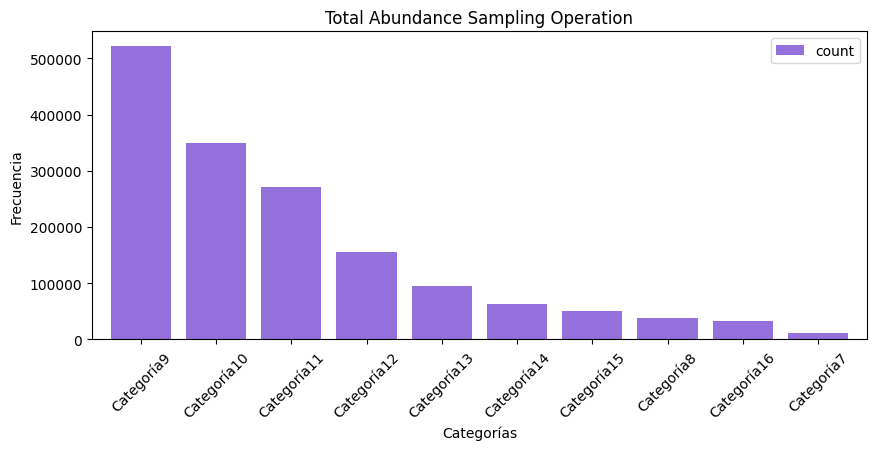

In [394]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index1.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "mediumpurple", rot=45)
plt.title('Total Abundance Sampling Operation')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

**Abundance_pm**

In [395]:
data_clean['Abundance_pm'].info()
n = 1643872

<class 'pandas.core.series.Series'>
RangeIndex: 1643872 entries, 0 to 1643871
Series name: Abundance_pm
Non-Null Count    Dtype  
--------------    -----  
1643872 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [396]:
# maximo y minimo, limites
max = data_clean['Abundance_pm'].max()
min = data_clean['Abundance_pm'].min()
limites = [min, max]
limites

[np.float64(2.0), np.float64(233.85300668151447)]

In [397]:
# rango r
r =max-min
r

np.float64(231.85300668151447)

In [398]:
# numero de intervalos de la clase "ni", aplicando la reglad e Sturges
ni = 1+3.32*np.log10(n)
ni

np.float64(21.636681754041682)

In [399]:
# ancho del intervalo "i"
i = r/ni
i

np.float64(10.715737714180912)

In [400]:
# categorizacion de variables
intervalos = np.linspace(1.9, 233.95,22)
intervalos

array([  1.9 ,  12.95,  24.  ,  35.05,  46.1 ,  57.15,  68.2 ,  79.25,
        90.3 , 101.35, 112.4 , 123.45, 134.5 , 145.55, 156.6 , 167.65,
       178.7 , 189.75, 200.8 , 211.85, 222.9 , 233.95])

In [401]:
categorias = [
 "Categoría1 (2 a 13)",
 "Categoría2 (13 a 24)",
 "Categoría3 (24 a 35)",
 "Categoría4 (35 a 46)",
 "Categoría5 (46 a 57)",
 "Categoría6 (57 a 68)",
 "Categoría7 (68 a 79)",
 "Categoría8 (79 a 90)",
 "Categoría9 (90 a 101)",
 "Categoría10 (101 a 112)",
 "Categoría11 (112 a 123)",
 "Categoría12 (123 a 134)",
 "Categoría13 (134 a 146)",
 "Categoría14 (146 a 157)",
 "Categoría15 (157 a 168)",
 "Categoría16 (168 a 179)",
 "Categoría17 (179 a 190)",
 "Categoría18 (190 a 201)",
 "Categoría19 (201 a 212)",
 "Categoría20 (212 a 223)",
 "Categoría21 (223 a 234)"
]


In [402]:
# Finalmente creamos las categorías en la columna numérica
data_clean['Abundance_pm'] = pd.cut(x=data_clean['Abundance_pm'], bins=intervalos, labels=labels)
data_clean['Abundance_pm']

0          Categoría2
1          Categoría1
2          Categoría1
3          Categoría1
4          Categoría1
              ...    
1643867    Categoría1
1643868    Categoría1
1643869    Categoría1
1643870    Categoría2
1643871    Categoría1
Name: Abundance_pm, Length: 1643872, dtype: category
Categories (21, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría18' < 'Categoría19' < 'Categoría20' < 'Categoría21']

In [403]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq2 = data_clean['Abundance_pm'].value_counts().reset_index()
Tabla_freq2

,Abundance_pm,count
0,Categoría1,1060281
1,Categoría2,224576
2,Categoría3,107734
3,Categoría4,54433
4,Categoría5,40110
5,Categoría6,30328
6,Categoría7,21536
7,Categoría8,18418
8,Categoría9,13934
9,Categoría10,11741


In [404]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro2= Tabla_freq2[Tabla_freq2['count']>9990]
Filtro2

,Abundance_pm,count
0,Categoría1,1060281
1,Categoría2,224576
2,Categoría3,107734
3,Categoría4,54433
4,Categoría5,40110
5,Categoría6,30328
6,Categoría7,21536
7,Categoría8,18418
8,Categoría9,13934
9,Categoría10,11741


In [405]:
#Ajusto el indice de mi dataframe
Filtro_index2= Filtro2.set_index('Abundance_pm')
Filtro_index2

,count
Abundance_pm,
Categoría1,1060281
Categoría2,224576
Categoría3,107734
Categoría4,54433
Categoría5,40110
Categoría6,30328
Categoría7,21536
Categoría8,18418
Categoría9,13934


Text(0, 0.5, 'Frecuencia')

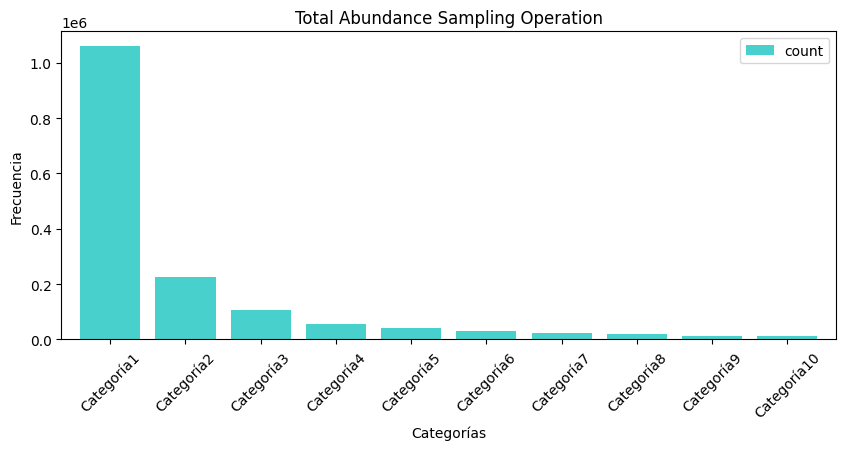

In [406]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index2.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "mediumturquoise", rot=45)
plt.title('Total Abundance Sampling Operation')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')